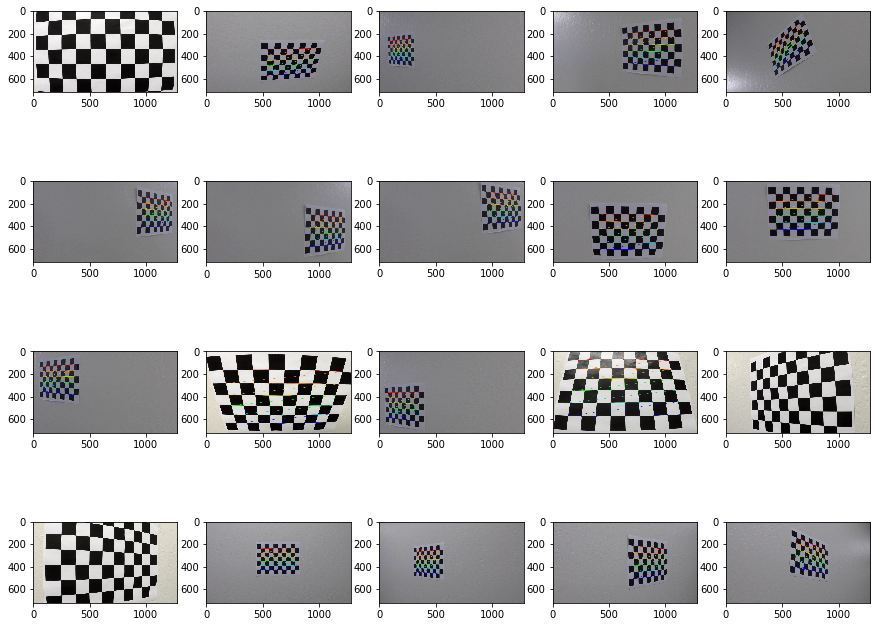

In [7]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(5,8,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
plt.figure(figsize=(15,12))
k=1
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray,(9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img,(9,6),corners,ret)

    plt.subplot(4,5,k)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    k=k+1

In [9]:
import pickle

img=cv2.imread('./camera_cal/calibration1.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,mtx,dist,rvecs,tvecs=cv2.calibrateCamera(objpoints,imgpoints,gray.shape[::-1],None,None)

with open('cam_mtx.pickle','wb') as handle:
    pickle.dump(mtx,handle,protocol=pickle.HIGHEST_PROTOCOL)
    print('camera matrix saved')
with open('dist_coeffs.pickle','wb') as handle:
    pickle.dump(dist,handle,protocol=pickle.HIGHEST_PROTOCOL)
    print('distortion coefficients saved')

camera matrix saved
distortion coefficients saved


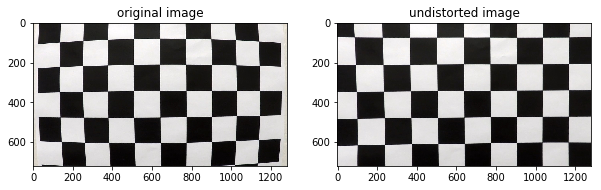

In [12]:
undist=cv2.undistort(img,mtx,dist,None,mtx)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('original image')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(undist,cv2.COLOR_BGR2RGB))
plt.title('undistorted image')